In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


Here, we implement the Naive Bayesian classifier on the synthetic data. First we read in the synthetic data, and split it into test and train (80-20 split).

In [2]:
df = pd.read_parquet("../10_datasets/synthetic.parquet", engine="fastparquet").reset_index(
    drop=True
)
train_data = df.sample(frac=0.8, random_state=3320)
test_data = df.drop(train_data.index)
train_x = train_data["total_post"]
train_y = train_data["label_type"]
test_x = test_data["total_post"]
test_y = test_data["label_type"]


Here, we use CountVectorizer from Scikit-Learn to calculate word frequency, stripping accents, converting all strings to lowercase, and removing stop words.

In [3]:
tf_vectorizer = CountVectorizer(strip_accents="unicode", lowercase = True, stop_words="english") 
X_train_tf = tf_vectorizer.fit_transform(train_x)

In [4]:
X_test_tf = tf_vectorizer.transform(test_x)
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

MultinomialNB()

In [5]:
y_pred = naive_bayes_classifier.predict(X_test_tf)
score1 = metrics.accuracy_score(test_y, y_pred)

In [6]:
score1

0.9145833333333333

After fitting the classifier, we can evaluate the score, build a confusion matrix, and extract precision and recall for each category

In [7]:
conf = metrics.confusion_matrix(test_y, y_pred)

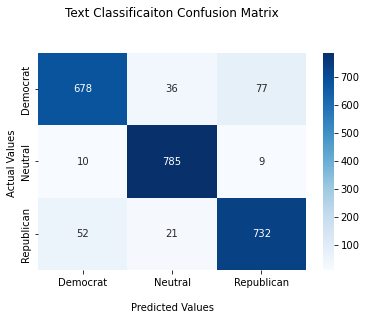

In [8]:
ax = sns.heatmap(conf, annot=True, fmt="g", cmap="Blues")
ax.set_title("Text Classificaiton Confusion Matrix\n\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values ")
ax.xaxis.set_ticklabels(["Democrat", "Neutral", "Republican"])
ax.yaxis.set_ticklabels(["Democrat", "Neutral", "Republican"])
plt.savefig("../30_outputs/synthetic_bayesian.png", bbox_inches="tight", dpi = 300)


In [9]:
print(metrics.classification_report(test_y, y_pred, target_names = ["democrat", "neutral", "republican"]))

              precision    recall  f1-score   support

    democrat       0.92      0.86      0.89       791
     neutral       0.93      0.98      0.95       804
  republican       0.89      0.91      0.90       805

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400

